In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

#  Randomly shuffle the dataset by taking a random seed of “42”. Create a testing set from the last 1000 rows of the dataframe (these must be the same for all the students). The remaining rows will be the training + validation set, with training : validation ratio of 80% : 20%. Determine 
A) number of rows in training, validation and test sets, along with the structure, datatypes and 
value counts of the dataframes.

In [6]:
df=pd.read_csv('House_Rent_Dataset.csv')
X=df[['Size','BHK','Bathroom','City','Area Type']]
Y=df['Rent']
X_train,X_test,Y_train,Y_test=train_test_split(X,Y, test_size=0.2, train_size=0.8, random_state=42 ,shuffle=True, stratify=None)


Number of rows in training

In [8]:
print(len(X_train),"Number of rows are their in training")

3796 Number of rows are their in training


Number of rows in testing

In [9]:
print(len(X_test),"Number of rows are their in training")

950 Number of rows are their in training


the structure of train data and test data

In [13]:
print(X_train.dtypes)
print("")
print(X_test.dtypes)

Size          int64
BHK           int64
Bathroom      int64
City         object
Area Type    object
dtype: object

Size          int64
BHK           int64
Bathroom      int64
City         object
Area Type    object
dtype: object


Printing Data of testing and training

In [14]:
X_train

,Size,BHK,Bathroom,City,Area Type
1995,950,2,2,Bangalore,Super Area
1497,800,2,2,Bangalore,Super Area
2763,545,1,1,Delhi,Super Area
1351,465,1,1,Mumbai,Super Area
1862,900,2,2,Bangalore,Super Area
...,...,...,...,...,...
4426,1500,3,3,Hyderabad,Carpet Area
466,1200,3,2,Kolkata,Super Area
3092,800,2,2,Chennai,Carpet Area
3772,3500,3,3,Chennai,Carpet Area


In [15]:
X_test

,Size,BHK,Bathroom,City,Area Type
1566,1100,2,2,Bangalore,Super Area
3159,800,2,2,Chennai,Super Area
538,518,2,2,Mumbai,Carpet Area
2630,1500,3,3,Delhi,Carpet Area
4418,2235,3,5,Hyderabad,Carpet Area
...,...,...,...,...,...
4124,1248,2,2,Hyderabad,Carpet Area
3400,1100,3,2,Chennai,Super Area
1941,950,2,2,Bangalore,Super Area
3679,1125,3,2,Chennai,Super Area


# Data Cleaning:
1. Analyse the data and identify which columns are not relevant for house rent prediction task. Drop those columns from the dataframes. 

In [17]:
Ndata=df.drop(['Floor','Point of Contact','Posted On','Area Locality'],axis=1)

2. Check for missing values and logically impute the dataset.


In [18]:
print('Missing in training Data',X_train.isnull().sum())
print("Missing in Orginal",Ndata.isnull().sum())

Missing in training Data Size         0
BHK          0
Bathroom     0
City         0
Area Type    0
dtype: int64
Missing in Orginal BHK                  0
Rent                 0
Size                 0
Area Type            0
City                 0
Furnishing Status    0
Tenant Preferred     0
Bathroom             0
dtype: int64


3. Identify any categorical valued columns (non-numeric) and convert them to numeric.

In [20]:
(Ndata.duplicated().sum())

277

# Exploratory Analysis (On training set)

1. Plot the house rents against the dependent variable of “size”. See if there is a uniform linear trend
between the dependent and independent variables. Make accurate axis and legend. Save the plot in a 
png file

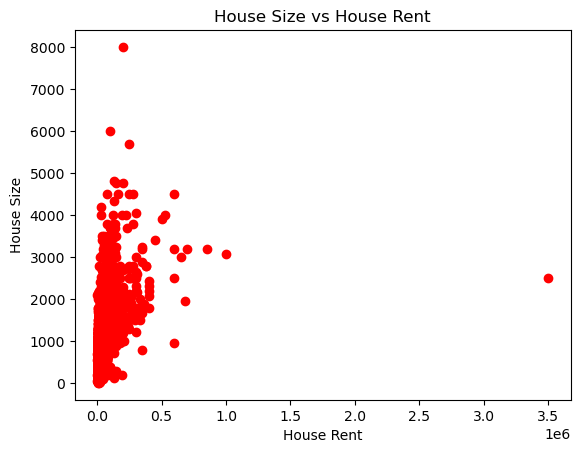

In [29]:
plt.scatter(Y_train,X_train['Size'],color='red')
plt.title("House Size vs House Rent")       
plt.ylabel("House Size")
plt.xlabel("House Rent")
plt.savefig('House size vs House Rent.png')
plt.show()

Text(0.5, 1.0, 'House Size vs BHK')

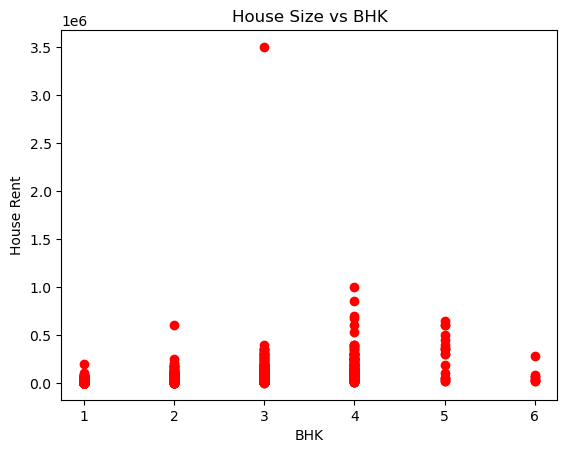

In [31]:
plt.scatter(X_train['BHK'],Y_train,color='red')
plt.xlabel("BHK")
plt.ylabel("House Rent")
plt.title("House Size vs BHK")  

Text(0.5, 1.0, 'City Vs House Rent')

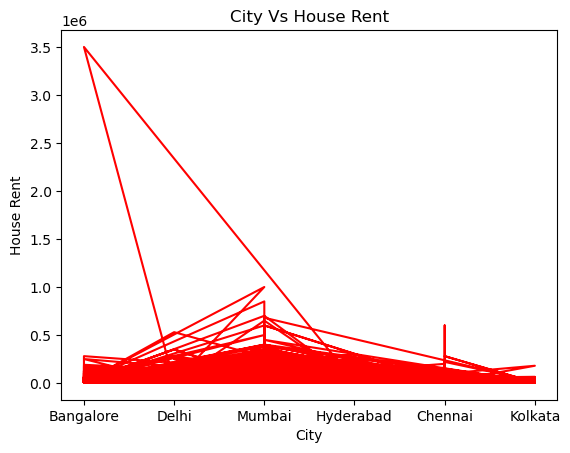

In [36]:
plt.plot(X_train['City'],Y_train,color='red')     
plt.xlabel("City")
plt.ylabel("House Rent")
plt.title("City Vs House Rent")  

Text(0.5, 1.0, 'City Vs House Rent')

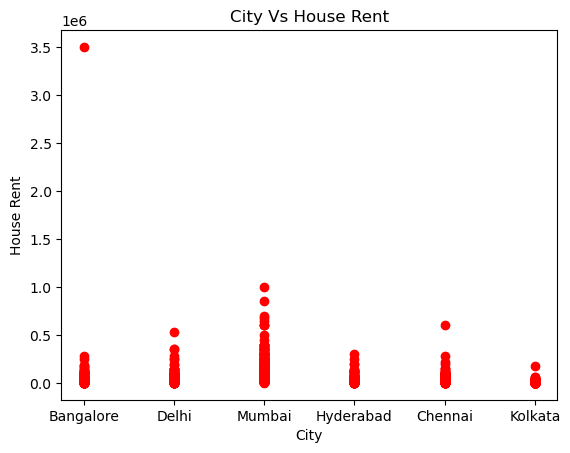

In [37]:
plt.scatter(X_train['City'],Y_train,color='red')     
plt.xlabel("City")
plt.ylabel("House Rent")
plt.title("City Vs House Rent")  

Text(0.5, 1.0, 'Area Type Vs House Size')

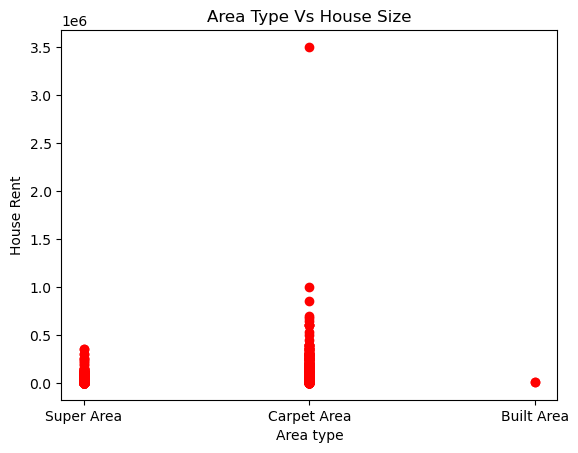

In [35]:
plt.scatter(X_train['Area Type'],Y_train,color='red')     
plt.xlabel("Area type")
plt.ylabel("House Rent")
plt.title("Area Type Vs House Size")  

2. Find average rent prices in different cities and report which city has the highest average rent

In [46]:
Avg=Ndata.groupby("City")['Rent'].mean()
print(Avg)

City
Bangalore    24966.365688
Chennai      21614.092031
Delhi        29461.983471
Hyderabad    20555.048387
Kolkata      11645.173664
Mumbai       85321.204733
Name: Rent, dtype: float64


In [50]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
a=LinearRegression()
a.fit(X_train[['Size']],Y_train)
Y_pred=a.predict(X_test[['Size']])
s=a.coef_
c=a.intercept_
print("Coefficient is = " ,s)
print("Intercept is  = " ,c) 

Coefficient is =  [49.45643895]
Intercept is  =  -12677.58950320886


In [51]:
mse=mean_squared_error(Y_test,Y_pred)
rmse=np.sqrt(mse)
print("Root Mean Square valuue is = ",rmse)
pd.DataFrame({'Actual Rent': Y_test, 'Predicted Rent': Y_pred})

Root Mean Square valuue is =  52161.29135909078


,Actual Rent,Predicted Rent
1566,16000,41724.493344
3159,12000,26887.561658
538,28000,12940.845874
2630,8000,61507.068925
4418,46000,97857.551554
...,...,...
4124,18000,49044.046309
3400,25000,41724.493344
1941,14000,34306.027501
3679,26000,42960.904318


Text(0, 0.5, 'House Rent')

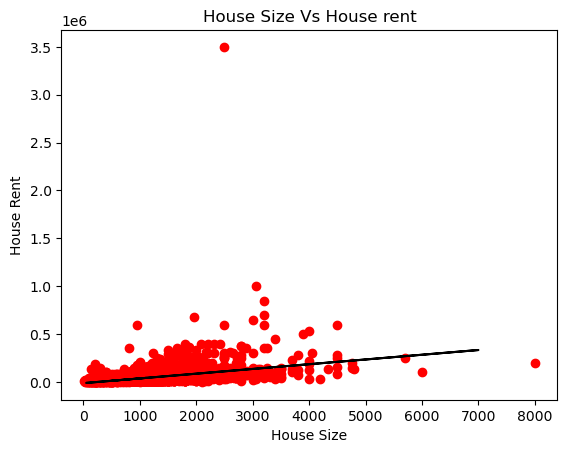

In [53]:
plt.scatter(X_train['Size'], Y_train,color='red') 
plt.plot(X_test['Size'], Y_pred,color='k') 
plt.title("House Size Vs House rent")
plt.xlabel("House Size")
plt.ylabel("House Rent")

In [54]:
a=LinearRegression()
a.fit(X_train[['Size','BHK','Bathroom']],Y_train)
Y_pred=a.predict(X_test[['Size','BHK','Bathroom']])
s=a.coef_
c=a.intercept_                                # Equation of regresssion line is 21.053x1-269.1315x2+27624.563x3-39022
X_train1=X_train[['Size','BHK','Bathroom']]
coeff=pd.DataFrame(a.coef_,X_train1.columns,columns=['Coefficents'])           
print("Intercept is  = " ,c) 
mse=mean_squared_error(Y_test,Y_pred)
rmse=np.sqrt(mse)
print("Root Mean Square valuue is = ",rmse)
t=pd.DataFrame({'Actual Rent': Y_test, 'Predicted Rent': Y_pred})   
print(coeff)
t
X_test,Y_test

Intercept is  =  -39022.92849685522
Root Mean Square valuue is =  50544.789811069684
           Coefficents
Size         21.053941
BHK        -269.131569
Bathroom  27624.563039


(      Size  BHK  Bathroom       City    Area Type
 1566  1100    2         2  Bangalore   Super Area
 3159   800    2         2    Chennai   Super Area
 538    518    2         2     Mumbai  Carpet Area
 2630  1500    3         3      Delhi  Carpet Area
 4418  2235    3         5  Hyderabad  Carpet Area
 ...    ...  ...       ...        ...          ...
 4124  1248    2         2  Hyderabad  Carpet Area
 3400  1100    3         2    Chennai   Super Area
 1941   950    2         2  Bangalore   Super Area
 3679  1125    3         2    Chennai   Super Area
 2531   500    1         1      Delhi   Super Area
 
 [950 rows x 5 columns],
 1566    16000
 3159    12000
 538     28000
 2630     8000
 4418    46000
         ...  
 4124    18000
 3400    25000
 1941    14000
 3679    26000
 2531    11000
 Name: Rent, Length: 950, dtype: int64)

Text(0, 0.5, 'House Rent')

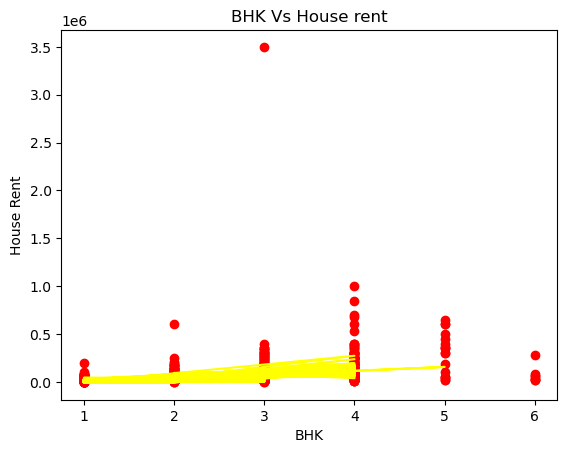

In [55]:
plt.scatter(X_train['BHK'], Y_train,color='red') 
plt.plot(X_test['BHK'], Y_pred,color='yellow') 
plt.title("BHK Vs House rent")
plt.xlabel("BHK")
plt.ylabel("House Rent")

Text(0, 0.5, 'House Rent')

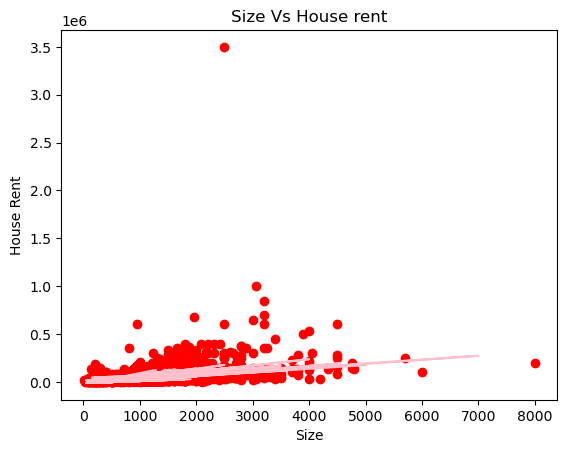

In [57]:
plt.scatter(X_train['Size'], Y_train,color='red') 
plt.plot(X_test['Size'], Y_pred,color='pink') 
plt.title("Size Vs House rent")
plt.xlabel("Size")
plt.ylabel("House Rent")

In [58]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression(max_iter=10,solver='liblinear')
model.fit(X_train[['Size','BHK','Bathroom']],Y_train)

C:\Users\91798\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LogisticRegression(max_iter=10, solver='liblinear')

In [60]:
from sklearn.metrics import accuracy_score,confusion_matrix
b=model.predict(X_train[['Size','BHK','Bathroom']])
c=accuracy_score(b,Y_train)
mse=mean_squared_error(Y_test,Y_pred)
#print(mse)
rmse=np.sqrt(mse)
print(rmse)

print("Accuracy score of training model = ",c)

50544.789811069684
Accuracy score of training model =  0.057692307692307696


In [61]:
b=model.predict(X_test[['Size','BHK','Bathroom']])
c=accuracy_score(b,Y_test)
print("Accuracy score of testing  model = ",c)   

Accuracy score of testing  model =  0.05578947368421053
